In [1]:
# House-keeping, ignores any warnings

import warnings
warnings.filterwarnings('ignore')

## Loading Training Data

In [2]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Identify Features

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Categorical Features: Survived, Sex, Embarked. Ordinal: Pclass
* Numerical Features: 
    * Continous: Age, Fare. 
    * Discrete: SibSp, Parch

## Analyze Features

Co-relate different features against their survival numbers.

In [6]:
def compare_columns(col1, col2):
    return train_df[[col1, col2]].groupby([col1], as_index=False).mean().sort_values(by=col2, ascending=False)

In [7]:
compare_columns('Sex', 'Survived')

,Sex,Survived
0,female,0.742038
1,male,0.188908


There is a high corelation that female passengers survived.

In [8]:
compare_columns('Pclass', 'Survived')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[['Survived', 'Sex', 'Pclass']].groupby(['Sex', 'Pclass'], as_index=False).mean()

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


There is a high corelation that upper class passengers had a better chance of surviving.

In [10]:
compare_columns('Parch', 'Survived')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [11]:
compare_columns('SibSp', 'Survived')

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


There is zero corelation for certain members of Parch and SibSp. It is best to derive a feature from these two features.

## Visualize data

### Survivors vs Dead

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02cd43db70>,
      dtype=object)

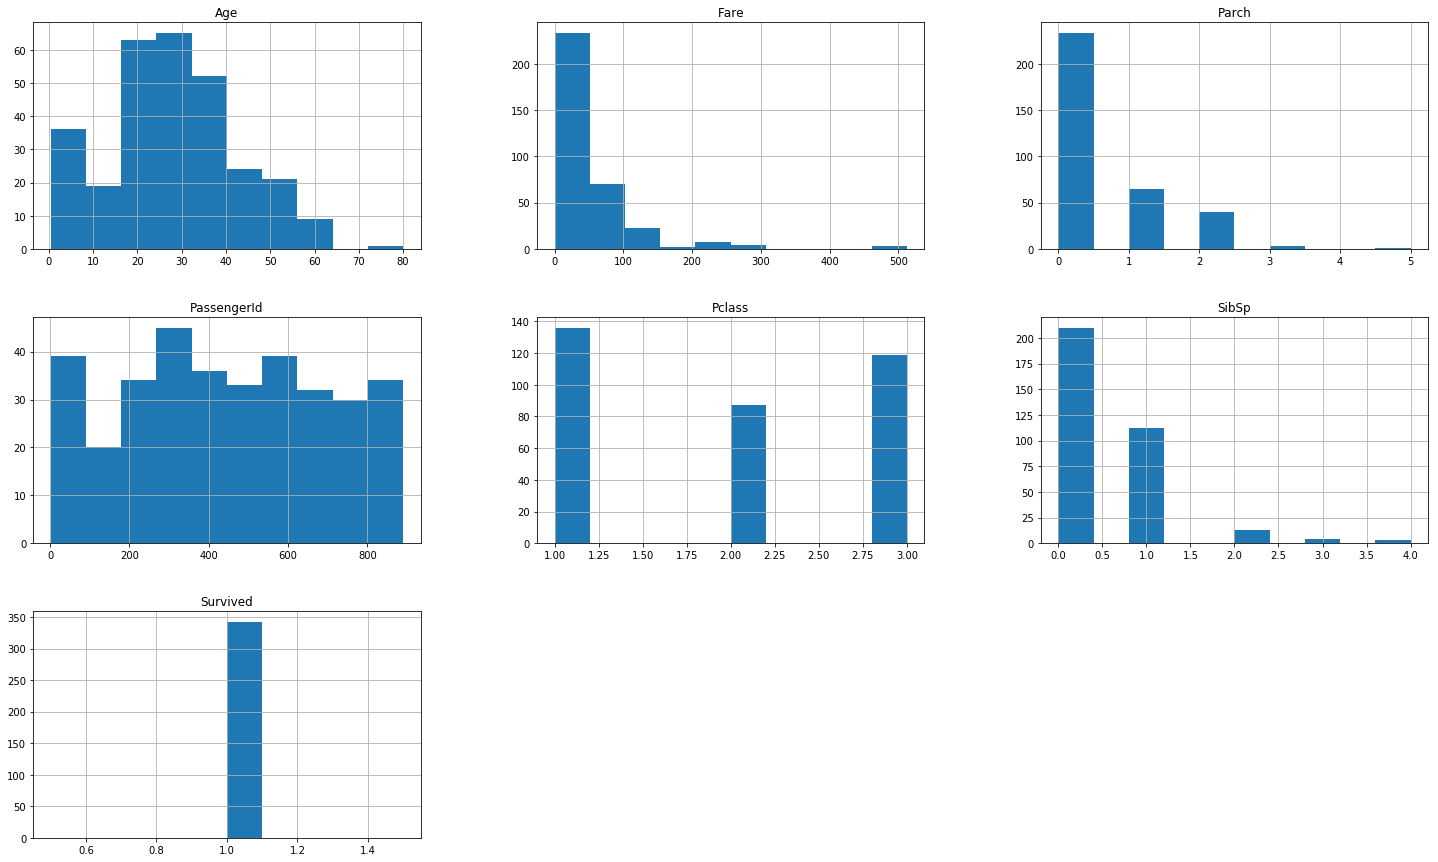

In [13]:
survivors = train_df[train_df['Survived'] == 1]
survivors.hist(figsize=(25, 15))

In [14]:
survivors.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02cb1e9160>,
      dtype=object)

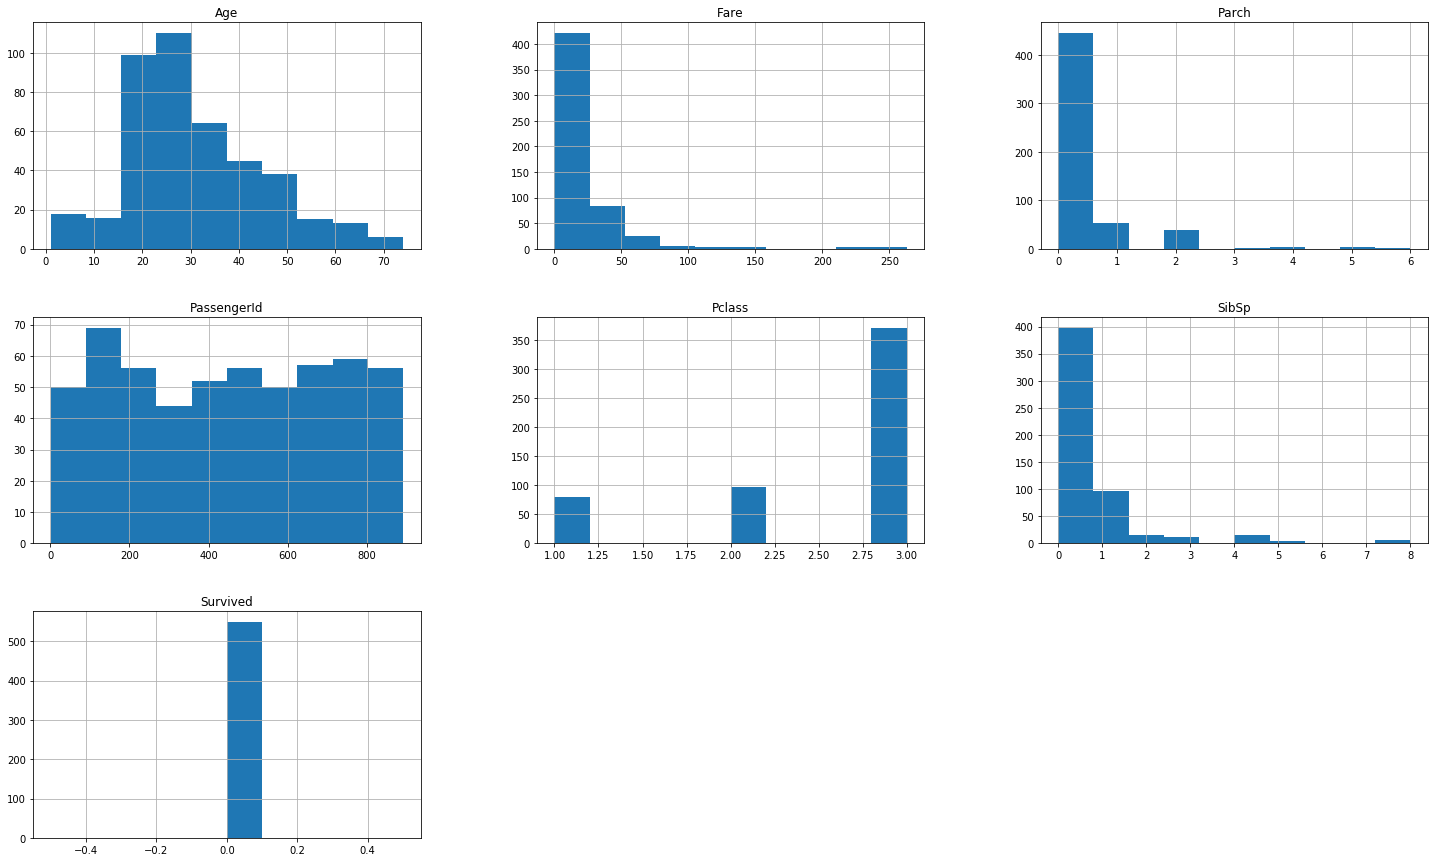

In [15]:
dead = train_df[train_df['Survived'] == 0]
dead.hist(figsize=(25, 15))

In [16]:
dead.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


### Various Passenger Classes

In [17]:
passenger_classes = []

for pclass in [1, 2, 3]:
    passenger_classes.append(train_df[train_df['Pclass'] == pclass])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02caea6320>,
      dtype=object)

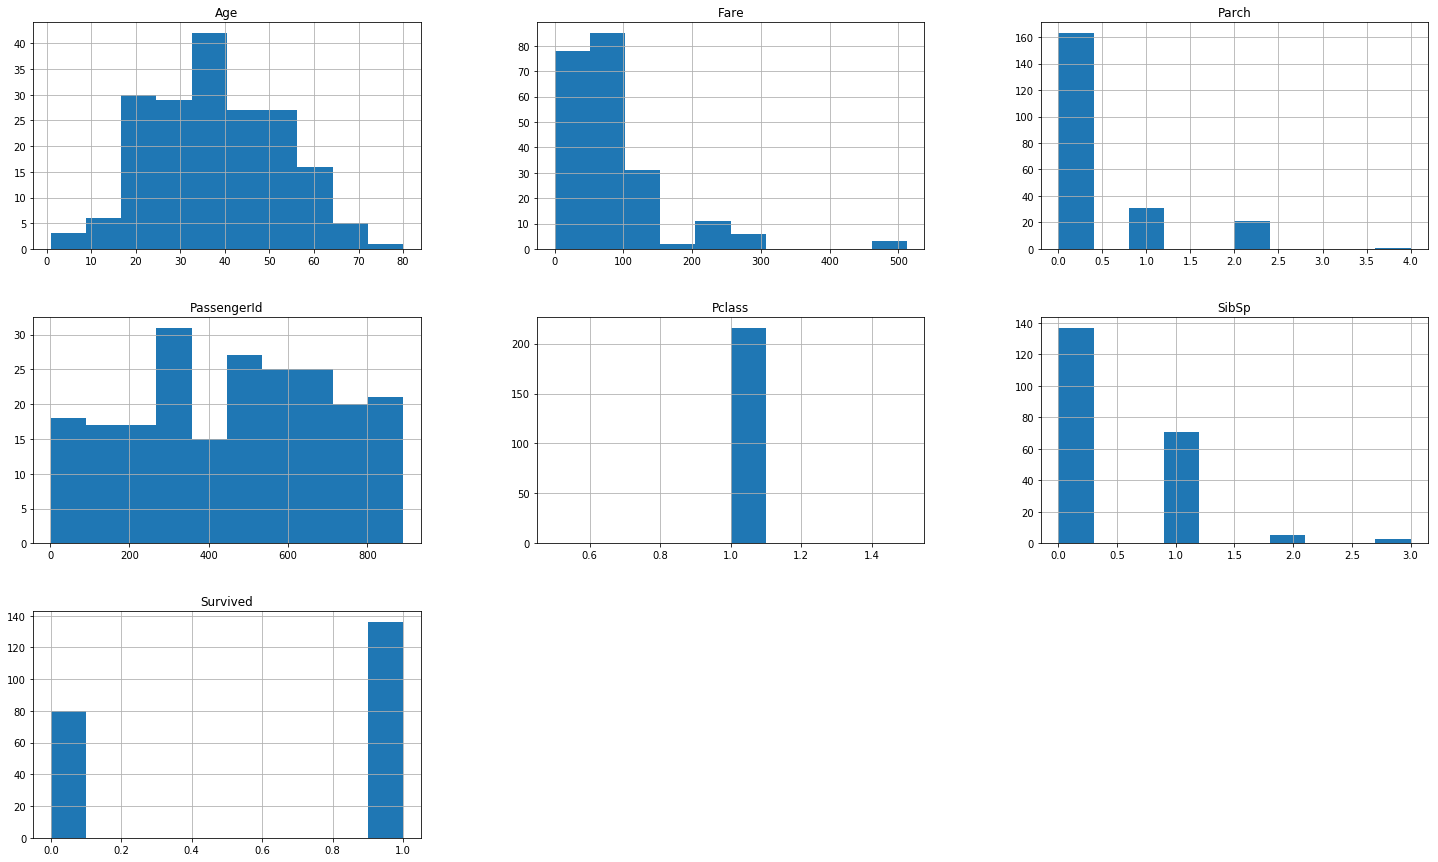

In [18]:
# 1st class
passenger_classes[0].hist(figsize=(25, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02ca6e3c50>,
      dtype=object)

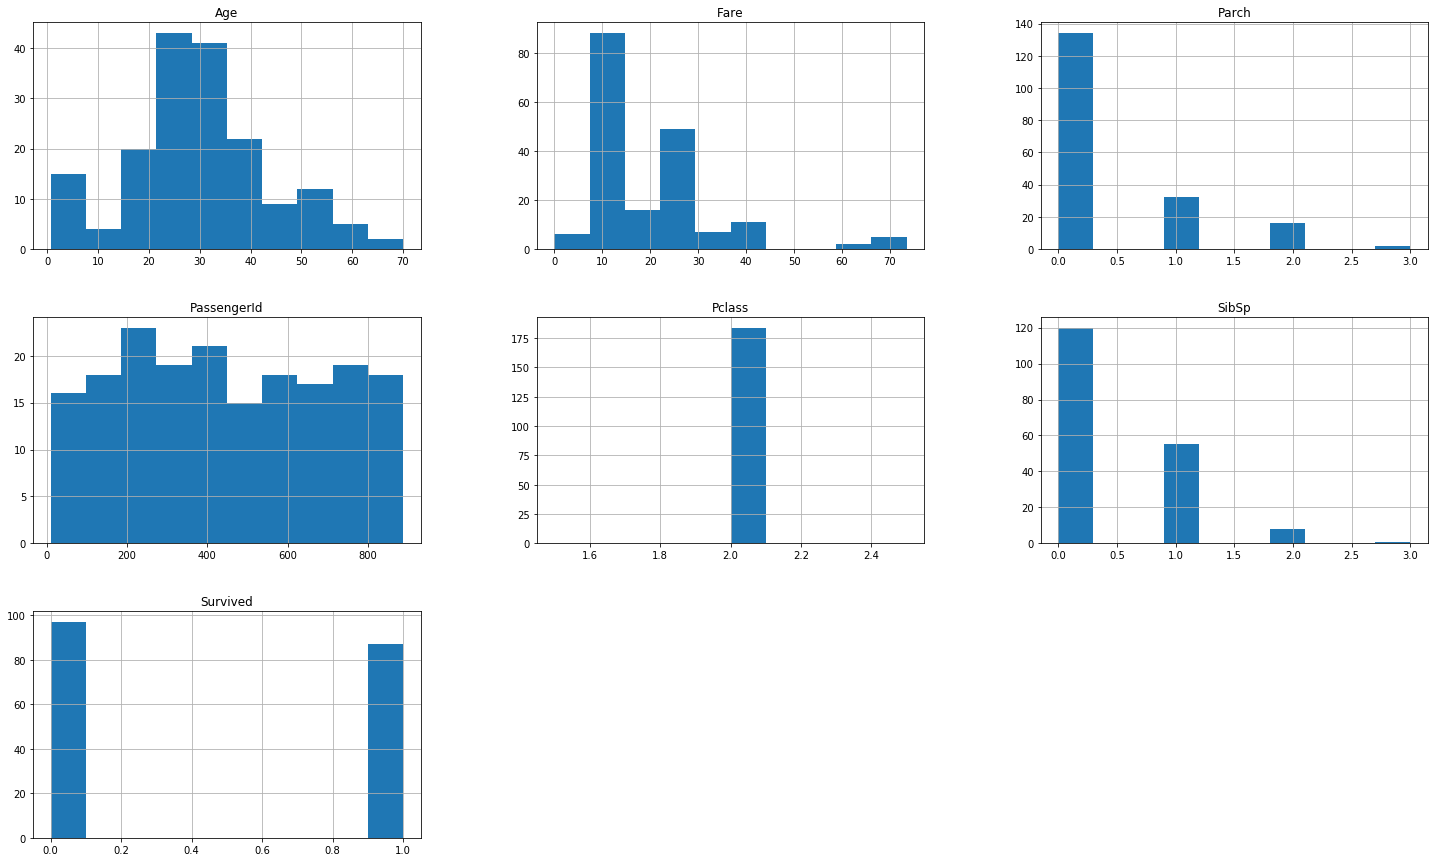

In [19]:
# 2nd class
passenger_classes[1].hist(figsize=(25, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02c9b88588>,
      dtype=object)

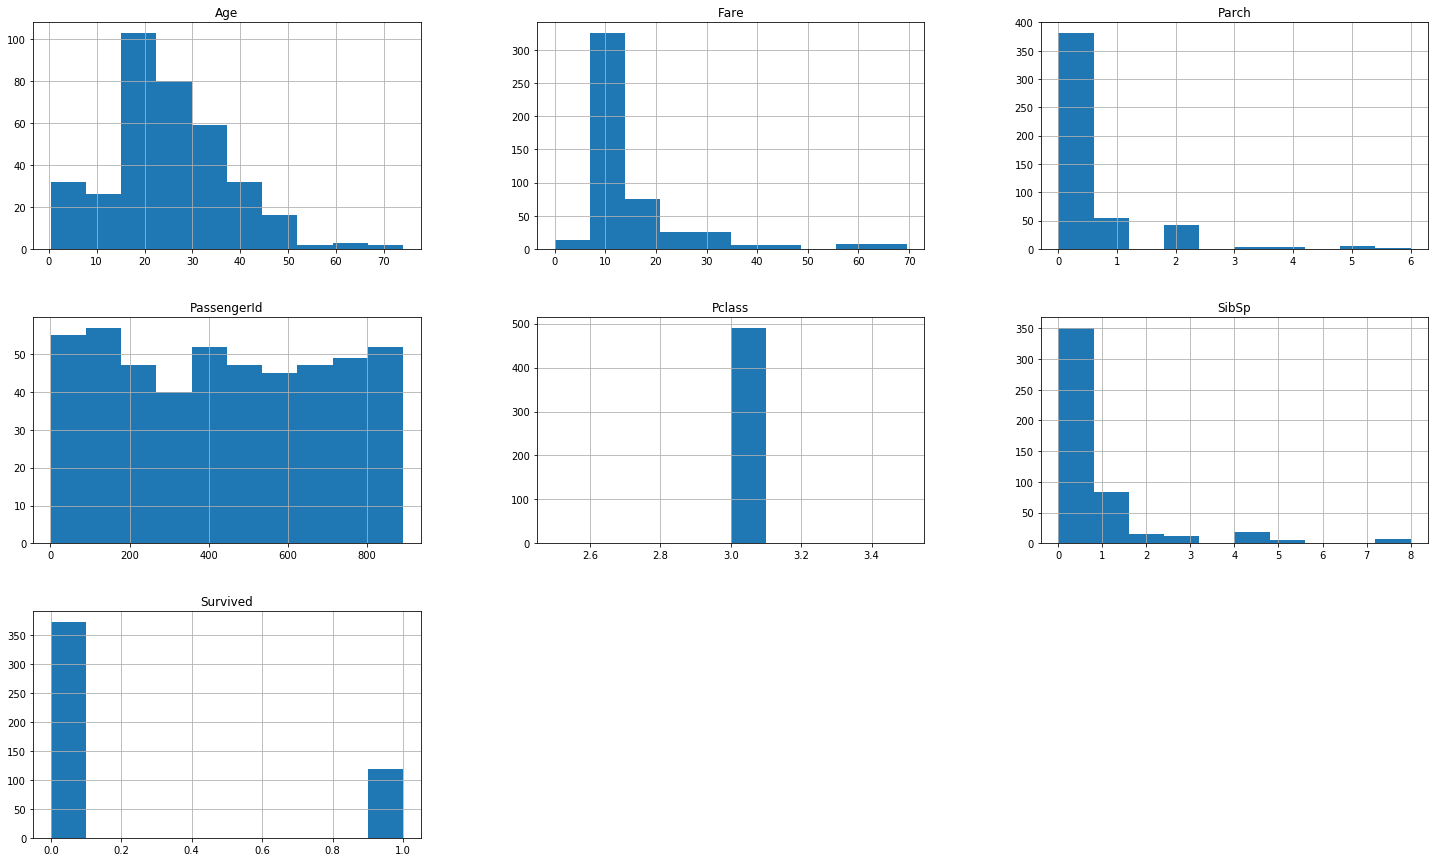

In [20]:
# 3rd class
passenger_classes[2].hist(figsize=(25, 15))

### By embarked port

Cherborg has the highest number of first class passengers. It is seen that the survival rates are higher for passengers from Cherborg and lowest for passengers from Southampton.

In [21]:
def survival_rates(embarked_port, survival_option):
    return (embarked_port[embarked_port['Survived']==survival_option].shape[0] / embarked_port.shape[0]) * 100

### Cherborg

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02c96df080>,
      dtype=object)

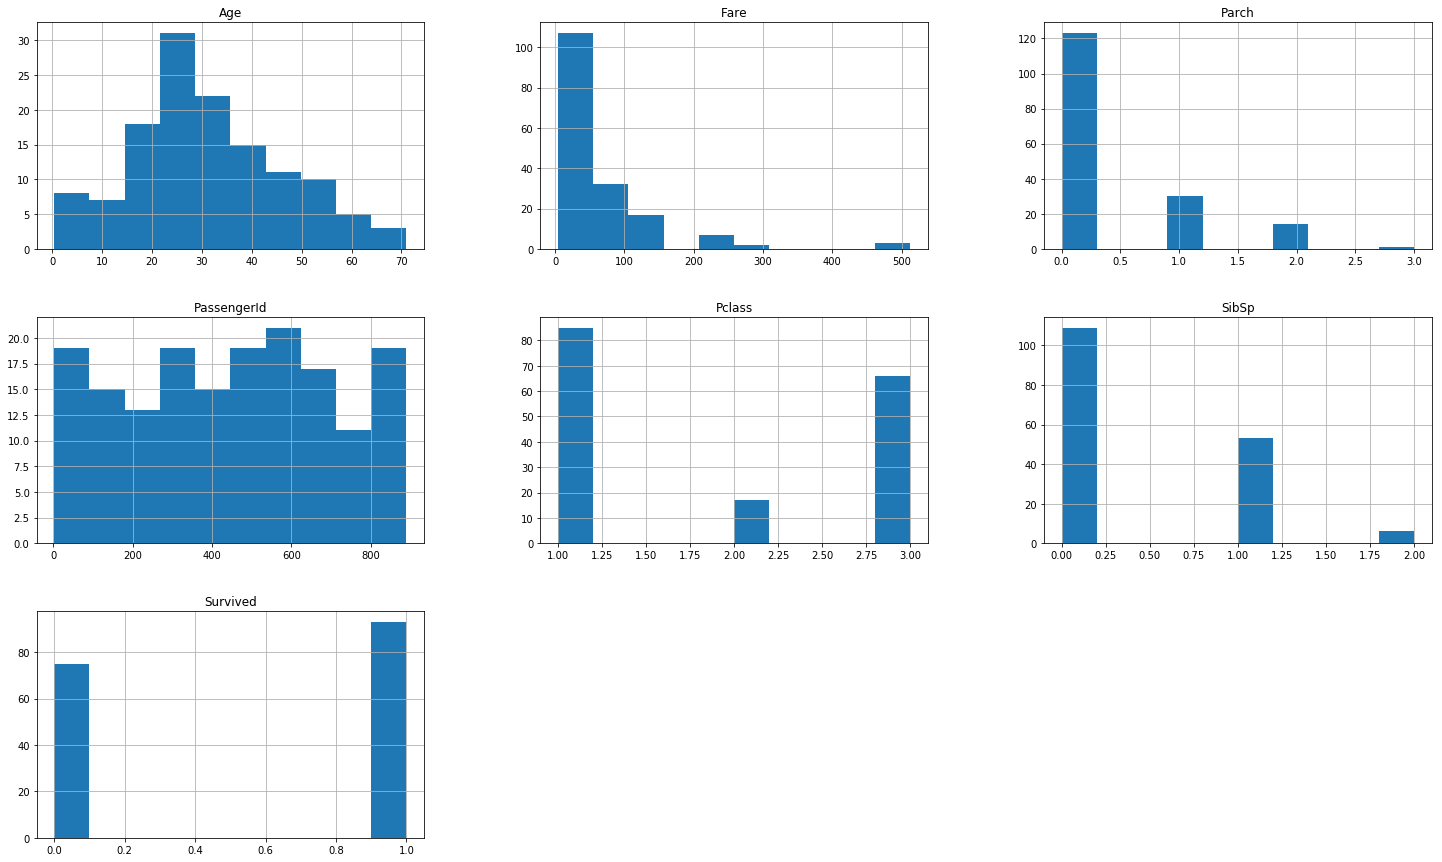

In [22]:
cherborg = train_df[train_df['Embarked'] == 'C']
cherborg.hist(figsize=(25, 15))

In [23]:
cherborg.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,168.000000,168.000000,168.000000,130.000000,168.000000,168.000000,168.000000
mean,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
std,259.454201,0.498608,0.944100,15.434860,0.557213,0.660481,83.912994
min,2.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,235.500000,0.000000,1.000000,21.250000,0.000000,0.000000,13.697950
50%,455.000000,1.000000,1.000000,29.000000,0.000000,0.000000,29.700000
75%,651.000000,1.000000,3.000000,40.000000,1.000000,1.000000,78.500025
max,890.000000,1.000000,3.000000,71.000000,2.000000,3.000000,512.329200


In [24]:
print('Survival Rate: {}\nMortality Rate: {}'.format(survival_rates(cherborg, 1), survival_rates(cherborg, 0)))

Survival Rate: 55.35714285714286
Mortality Rate: 44.642857142857146


### Southampton

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02c8f33b38>,
      dtype=object)

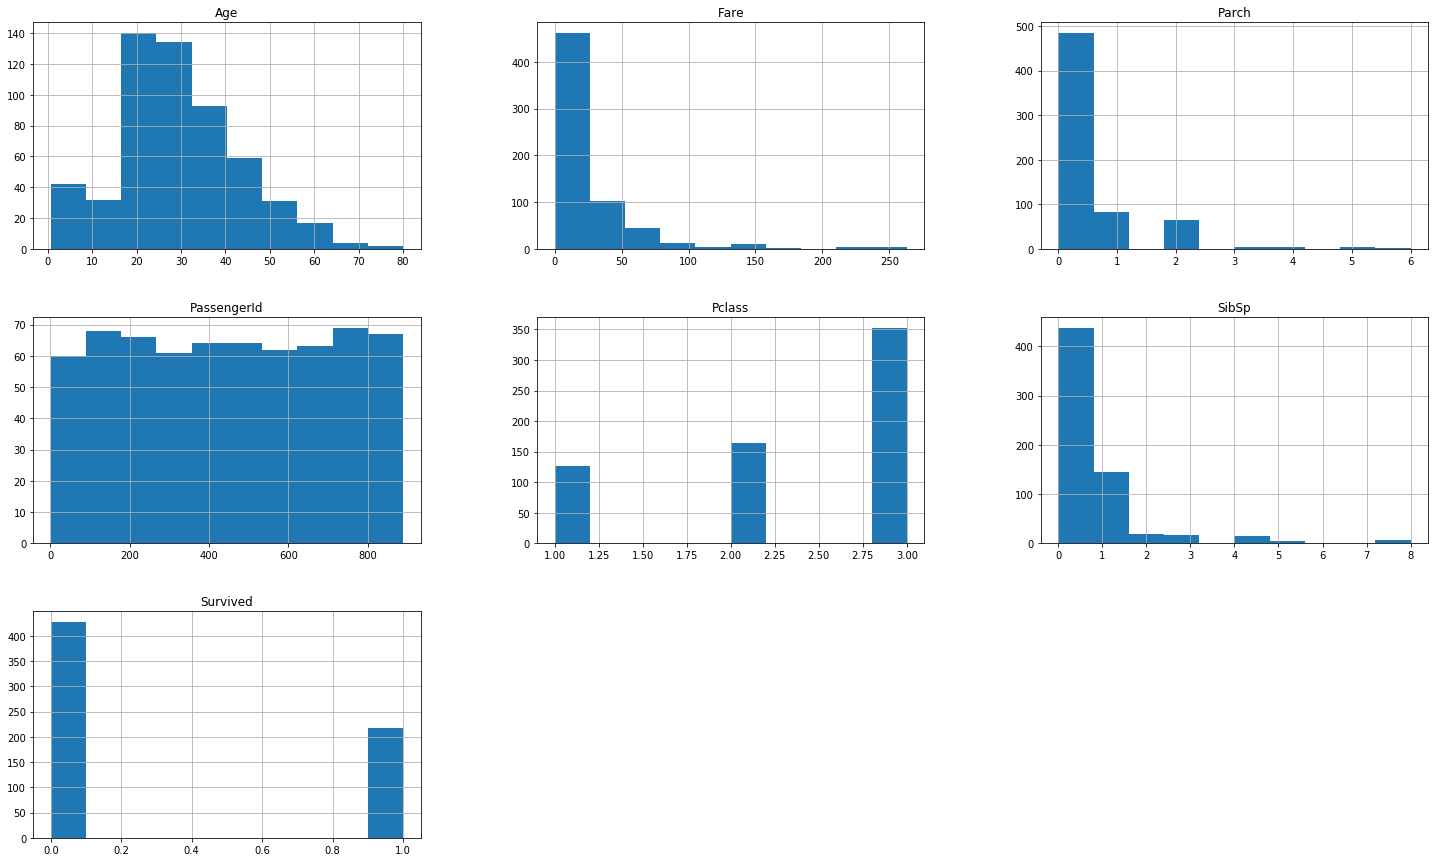

In [25]:
southampton = train_df[train_df['Embarked'] == 'S']
southampton.hist(figsize=(25, 15))

In [26]:
southampton.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,644.000000,644.000000,644.000000,554.000000,644.000000,644.000000,644.000000
mean,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812
std,256.942044,0.473037,0.789402,14.143192,1.216600,0.853253,35.887993
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,225.750000,0.000000,2.000000,21.000000,0.000000,0.000000,8.050000
50%,447.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,673.250000,1.000000,3.000000,38.000000,1.000000,0.000000,27.900000
max,889.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


In [27]:
print('Survival Rate: {}\nMortality Rate: {}'.format(survival_rates(southampton, 1), survival_rates(southampton, 0)))

Survival Rate: 33.69565217391305
Mortality Rate: 66.30434782608695


### Queenstown

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02c8991828>,
      dtype=object)

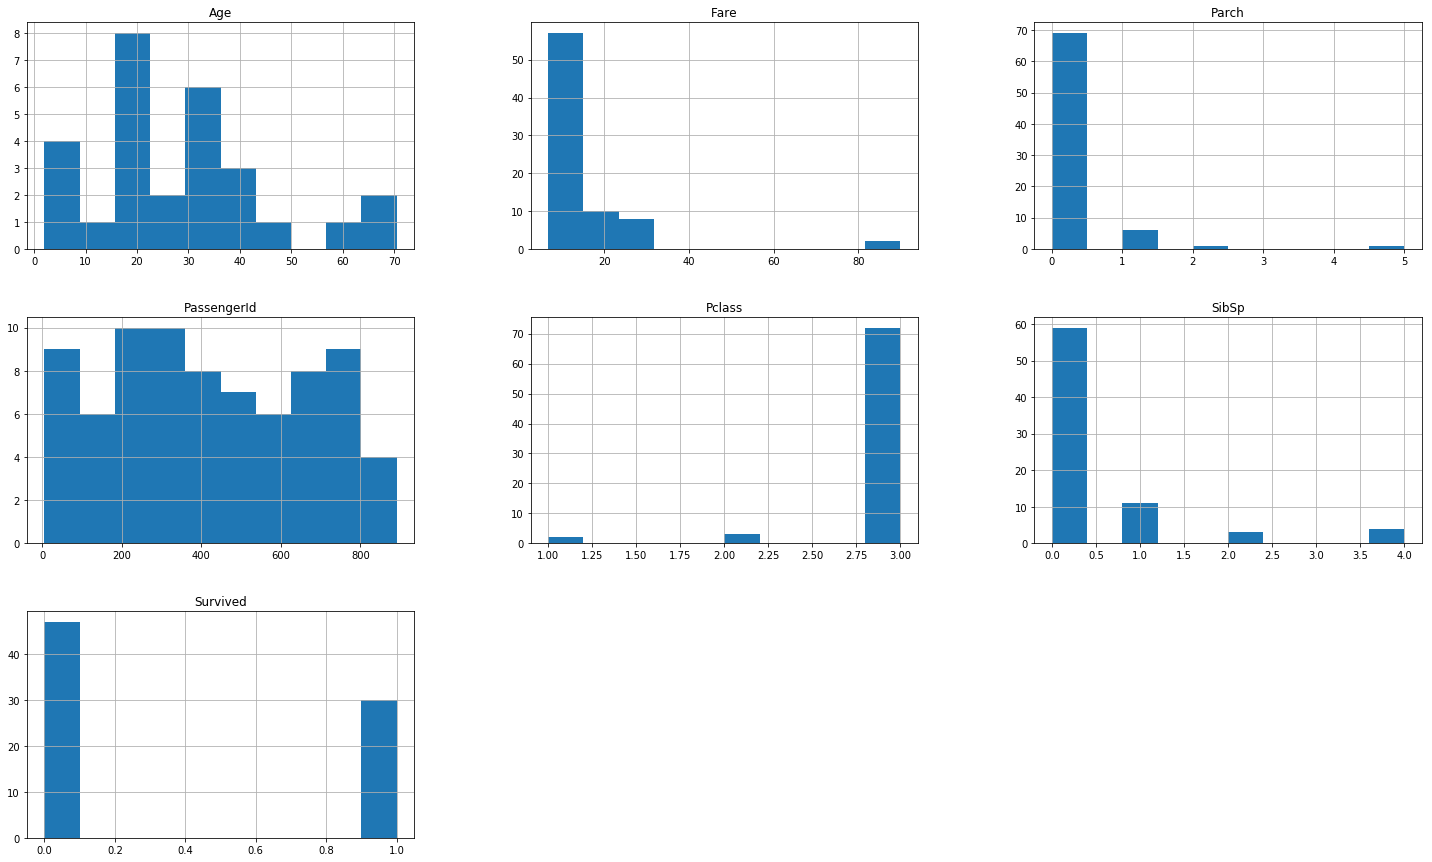

In [28]:
queenstown = train_df[train_df['Embarked'] == 'Q']
queenstown.hist(figsize=(25, 15))

In [29]:
queenstown.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,77.000000,77.00000,77.000000,28.000000,77.000000,77.000000,77.000000
mean,417.896104,0.38961,2.909091,28.089286,0.428571,0.168831,13.276030
std,253.646282,0.49086,0.369274,16.915396,0.979105,0.656999,14.188047
min,6.000000,0.00000,1.000000,2.000000,0.000000,0.000000,6.750000
25%,209.000000,0.00000,3.000000,17.500000,0.000000,0.000000,7.750000
50%,389.000000,0.00000,3.000000,27.000000,0.000000,0.000000,7.750000
75%,630.000000,1.00000,3.000000,34.500000,0.000000,0.000000,15.500000
max,891.000000,1.00000,3.000000,70.500000,4.000000,5.000000,90.000000


In [30]:
print('Survival Rate: {}\nMortality Rate: {}'.format(survival_rates(queenstown, 1), survival_rates(queenstown, 0)))

Survival Rate: 38.961038961038966
Mortality Rate: 61.038961038961034


## Data Cleaning

Drop Ticket and Cabin columns from dataframe.

In [31]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

combined_df_list = [train_df, test_df]

Create a column named 'Title', containing any extracted titles from the name and drop the 'Name' column.

In [32]:
for df in combined_df_list:
    df['Title'] = df['Name'].str.extract('([A-za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [33]:
for df in combined_df_list:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 
                                       'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [34]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for df in combined_df_list:
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [35]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

combined_df_list = [train_df, test_df]

In [36]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


Map categorical features to numerical value. Both Sex and Embarked are examples of this type of feature. Embarked also contains several values that are missing, they need to be replaced with the median value.

In [37]:
for df in combined_df_list:
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [38]:
# Mapping port of embarkment to numeric features
# Southampton: 0
# Cherborg: 1
# Queenstown: 2

for df in combined_df_list:
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    embarked_median = df['Embarked'].median()
    df['Embarked'].fillna(embarked_median, inplace=True)
    df['Embarked'] = df['Embarked'].astype(int)

In [39]:
train_df[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
1,0.553571
2,0.389610
0,0.339009


Age, SibSp and Parch still need cleaning. The other features are looking better now.

In [40]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,1
1,893,3,1,47.0,1,0,7.0000,0,3
2,894,2,0,62.0,0,0,9.6875,2,1
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,3


In [41]:
# Age contains missing values as well as decimal ages
set(train_df['Age'])

{nan,
 nan,
 2.0,
 nan,
 3.0,
 4.0,
 nan,
 nan,
 nan,
 8.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 5.0,
 13.0,
 14.0,
 14.5,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 26.0,
 27.0,
 28.0,
 28.5,
 29.0,
 nan,
 31.0,
 nan,
 nan,
 9.0,
 34.0,
 35.0,
 nan,
 7.0,
 11.0,
 12.0,
 37.0,
 38.0,
 39.0,
 40.0,
 42.0,
 44.0,
 45.0,
 45.5,
 46.0,
 47.0,
 49.0,
 50.0,
 51.0,
 54.0,
 55.0,
 55.5,
 56.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 70.0,
 70.5,
 71.0,
 74.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 20.5,
 80.0,
 nan,
 nan,
 6.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 23.5,
 nan,
 nan,
 nan,
 24.5,
 nan,
 nan,
 nan,
 nan,
 25.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.42,
 nan,
 nan,
 nan,
 30.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 32.0,
 32.5,
 nan,
 nan,
 33.0,
 34.5,
 nan,
 nan,
 nan,
 nan,
 36.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.67,
 0.83,
 10.

Let's take a closer look at the age groups for every passenger class based on Sex.

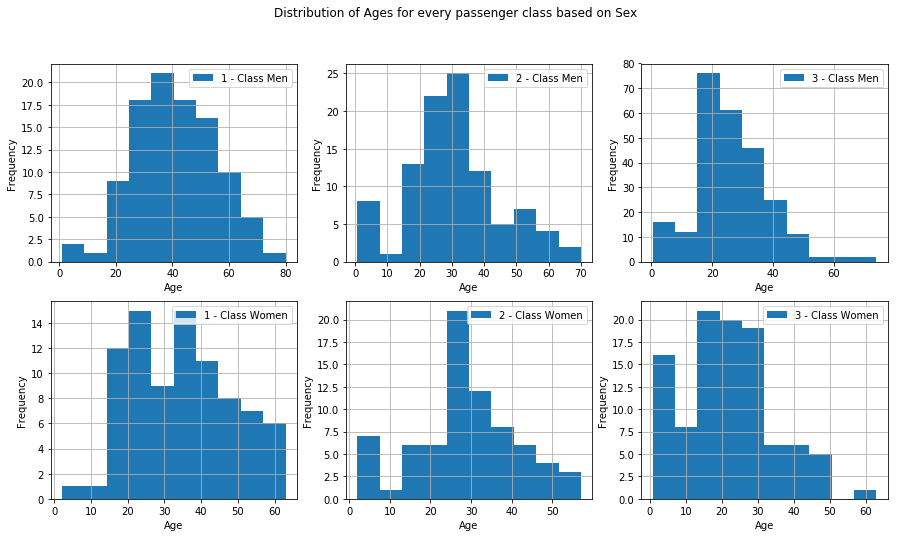

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Distribution of Ages for every passenger class based on Sex')

for pclass in [1, 2, 3]:
    p_class_men = train_df.query('Pclass == {} & Sex == 0'.format(pclass))
    p_class_women = train_df.query('Pclass == {} & Sex == 1'.format(pclass))
    ax_men = p_class_men['Age'].plot(kind='hist', ax=axes[0][pclass-1], grid=True, 
                            label='{} - Class Men'.format(pclass), legend=True)
    ax_men.set_xlabel('Age')
    ax_men.set_ylabel('Frequency')
    ax_women = p_class_women['Age'].plot(kind='hist', ax=axes[1][pclass-1], grid=True, 
                              label='{} - Class Women'.format(pclass), legend=True)
    ax_women.set_xlabel('Age')
    ax_women.set_ylabel('Frequency')

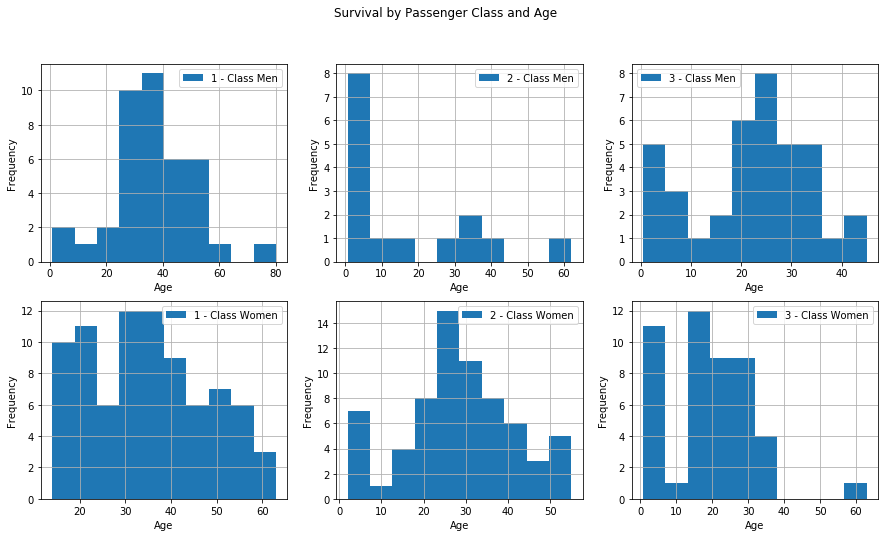

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Survival by Passenger Class and Age')

for pclass in [1, 2, 3]:
    p_class = train_df.query('Pclass == {} & Survived == 1'.format(pclass))
    p_class_men = p_class[p_class['Sex'] == 0]
    p_class_women = p_class[p_class['Sex'] == 1]
    ax_men = p_class_men['Age'].plot(kind='hist', ax=axes[0][pclass-1], grid=True, 
                            label='{} - Class Men'.format(pclass), legend=True)
    ax_men.set_xlabel('Age')
    ax_men.set_ylabel('Frequency')
    ax_women = p_class_women['Age'].plot(kind='hist', ax=axes[1][pclass-1], x='Age', y='Frequency', grid=True, 
                              label='{} - Class Women'.format(pclass), legend=True)
    ax_women.set_xlabel('Age')
    ax_women.set_ylabel('Frequency')

It is clear from the above figures that there is a difference in the distributions of sexes based on the class of the passenger. Filling NaNs with the overall median will not be a good representation. Therefore, we must fill NaNs based on the median of the passenger class. 

In [44]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,0,27.0,0,0,13.00,0,5
887,1,1,1,19.0,0,0,30.00,0,2
888,0,3,1,NaN,1,2,23.45,0,2
889,1,1,0,26.0,0,0,30.00,1,1
890,0,3,0,32.0,0,0,7.75,2,1


In [45]:
import numpy as np

rounded_age = np.zeros((2, 3))

for df in combined_df_list:
    for i in range(0, 2):
        for j in range(0, 3):
            df1 = df.query('Sex == {} & Pclass == {}'.format(i, j+1))['Age'].dropna()
            rounded_age[i, j] = int(df1.median()/0.5 + 0.5) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df['Age'].isnull()) & (df['Sex'] == i) & (df['Pclass'] == j+1), 'Age' ] = rounded_age[i, j]
            
    df['Age'] = df['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,0,1
1,1,1,1,38,1,0,71.2833,1,3
2,1,3,1,26,0,0,7.9250,0,2
3,1,1,1,35,1,0,53.1000,0,3
4,0,3,0,35,0,0,8.0500,0,1


In [46]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


In [47]:
# Replace Age with Ordinal values based on the above bin values 
for df in combined_df_list:    
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4

# Drop AgeBand feature 
train_df = train_df.drop(['AgeBand'], axis=1)
combined_df_list = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1


In [48]:
print('Set of training df: {} and test df: {}'.format(set(train_df['Age']), set(test_df['Age'])))

Set of training df: {0, 1, 2, 3, 4} and test df: {0, 1, 2, 3, 4}


Combine SibSp and Parch to create a single feature FamilySize.

In [49]:
for df in combined_df_list:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived', 
                                                                                              ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [50]:
for df in combined_df_list:
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Families are good for survival apparently. Drop SibSp, Parch and FamilySize.

In [51]:
train_df = train_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)

combined_df_list = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


Create a feature FareBand similar to AgeBand.

In [52]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,2,7.0000,0,3,0
2,894,2,0,3,9.6875,2,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


In [53]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', 
                                                                                            ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [54]:
for df in combined_df_list:
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combined_df_list = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
5,0,3,0,1,1,2,1,1
6,0,1,0,3,3,0,1,1
7,0,3,0,0,2,0,4,0
8,1,3,1,1,1,0,3,0
9,1,2,1,0,2,1,3,0


In [55]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


In [56]:
from future_encoders import OneHotEncoder

def one_hot_encode(data):
    one_hot_encoder = OneHotEncoder()
    return one_hot_encoder.fit_transform(data)

In [57]:
X_train = one_hot_encode(train_df.drop('Survived', axis=1))
Y_train = train_df['Survived']
X_test = one_hot_encode(test_df.drop('PassengerId', axis=1))

## Model, Predict and Solve

In [58]:
X_train.shape, Y_train.shape, X_test.shape

((891, 24), (891,), (418, 24))

In [59]:
def save_submission(model_name, predictions):
    submission = pd.DataFrame({
            'PassengerId': test_df['PassengerId'],
            'Survived': predictions
        })

    submission.to_csv('gender_submission_{}.csv'.format(model_name), index=False)

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_test = log_reg.predict(X_test)
save_submission('log_reg', Y_test)
acc_log = round(log_reg.score(X_train, Y_train) * 100, 2)
acc_log

82.15

### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_test = decision_tree.predict(X_test)
save_submission('decision_tree', Y_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_test = random_forest.predict(X_test)
save_submission('random_forest', Y_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

/home/ninja/Documents/virtualenv/tensorflow_py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


86.64

### Randomized Search

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

random_forest = RandomForestClassifier()
rnd_search = RandomizedSearchCV(random_forest, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f02ba78ec50>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f02ba78eda0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [64]:
final_model = rnd_search.best_estimator_

final_predictions = final_model.predict(X_test)
save_submission('random_search_random_forest', final_predictions)